In [4]:
from rich import print
import torch

# import autoencoder.ae_model as ae
# import autoencoder.ae_training as T
import utils.io_utils as ioutils
import utils.json_utils as jutils
from utils.logging_utils import setup_logger

## Logging

In [5]:
# Initialize logger
log_dir = "/home/ubuntu/projects/Master-Internship/logs/"
log_file = "test_model.log"
logger = setup_logger("INFO", log_to_file=False, log_dir=log_dir, log_file=log_file)

## Load Data

In [6]:
path_to_data = "../data/adata_1000x1000_sample_normalized.h5ad"

adata = ioutils.load_adata(path_to_data, logger)

2024-08-29 10:30:49,282 - INFO :: Start loading dataset: adata_1000x1000_sample_normalized.h5ad
2024-08-29 10:30:49,361 - INFO :: Dataset loaded


In [7]:
adata

AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'min_max_normalized'

## Load Config

In [8]:
config_json = jutils.import_config_json("../config/autoencoder_test.json")

In [9]:
config = jutils.Config(**config_json)
print(config)

Config(
    model=ModelConfig(
        name='AE_test',
        type='ae',
        loss_function=<class 'torch.nn.modules.loss.MSELoss'>,
        layers=CoderConfig(
            encoder=[
                LayerConfig(
                    role='input',
                    type=<class 'torch.nn.modules.linear.Linear'>,
                    in_dimension=5000,
                    out_dimension=2500,
                    activation=<class 'torch.nn.modules.activation.SiLU'>
                ),
                LayerConfig(
                    role='hidden',
                    type=<class 'torch.nn.modules.linear.Linear'>,
                    in_dimension=2500,
                    out_dimension=1250,
                    activation=<class 'torch.nn.modules.activation.SiLU'>
                ),
                LayerConfig(
                    role='hidden',
                    type=<class 'torch.nn.modules.linear.Linear'>,
                    in_dimension=1250,
                    out_dimension=625,
                    activation=<class 'torch.nn.modules.activation.SiLU'>
                ),
                LayerConfig(
                    role='latent_space',
                    type=<class 'torch.nn.modules.linear.Linear'>,
                    in_dimension=625,
                    out_dimension=100,
                    activation=None
                )
            ],
            decoder=[
                LayerConfig(
                    role='input',
                    type=<class 'torch.nn.modules.linear.Linear'>,
                    in_dimension=100,
                    out_dimension=625,
                    activation=<class 'torch.nn.modules.activation.SiLU'>
                ),
                LayerConfig(
                    role='hidden',
                    type=<class 'torch.nn.modules.linear.Linear'>,
                    in_dimension=625,
                    out_dimension=1250,
                    activation=<class 'torch.nn.modules.activation.SiLU'>
                ),
                LayerConfig(
                    role='hidden',
                    type=<class 'torch.nn.modules.linear.Linear'>,
                    in_dimension=1250,
                    out_dimension=2500,
                    activation=<class 'torch.nn.modules.activation.SiLU'>
                ),
                LayerConfig(
                    role='output',
                    type=<class 'torch.nn.modules.linear.Linear'>,
                    in_dimension=2500,
                    out_dimension=5000,
                    activation=None
                )
            ]
        ),
        optimization=OptimizerConfig(
            optimizer=<class 'torch.optim.adam.Adam'>,
            learning_rate=0.01,
            weight_decay=0.001
        )
    ),
    training=TrainingConfig(batch_size=256, training_epochs=5)
)

## Smallest Donor Splits

In [10]:
adata[adata.obs["donor"] == "D1"]

View of AnnData object with n_obs × n_vars = 38 × 1000
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'min_max_normalized'

In [11]:
adata[adata.obs["donor"] == "H2"]

View of AnnData object with n_obs × n_vars = 38 × 1000
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'min_max_normalized'

In [12]:
adata[adata.obs["donor"] == "D5"]

View of AnnData object with n_obs × n_vars = 50 × 1000
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'min_max_normalized'

## Load Model

In [13]:
encoder_layers = jutils.assemble_layers(config.model.layers.encoder)
encoder_layers

[Linear(in_features=5000, out_features=2500, bias=True),
 SiLU(),
 Linear(in_features=2500, out_features=1250, bias=True),
 SiLU(),
 Linear(in_features=1250, out_features=625, bias=True),
 SiLU(),
 Linear(in_features=625, out_features=100, bias=True)]

In [14]:
decoder_layers = jutils.assemble_layers(config.model.layers.decoder)
decoder_layers

[Linear(in_features=100, out_features=625, bias=True),
 SiLU(),
 Linear(in_features=625, out_features=1250, bias=True),
 SiLU(),
 Linear(in_features=1250, out_features=2500, bias=True),
 SiLU(),
 Linear(in_features=2500, out_features=5000, bias=True)]

In [15]:
model = ae.Autoencoder(encoder_layers, decoder_layers, config.model.loss_function())
model

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=5000, out_features=2500, bias=True)
    (1): SiLU()
    (2): Linear(in_features=2500, out_features=1250, bias=True)
    (3): SiLU()
    (4): Linear(in_features=1250, out_features=625, bias=True)
    (5): SiLU()
    (6): Linear(in_features=625, out_features=100, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=100, out_features=625, bias=True)
    (1): SiLU()
    (2): Linear(in_features=625, out_features=1250, bias=True)
    (3): SiLU()
    (4): Linear(in_features=1250, out_features=2500, bias=True)
    (5): SiLU()
    (6): Linear(in_features=2500, out_features=5000, bias=True)
  )
  (loss_function): MSELoss()
)

## Create Fold

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"

data_layer = "min_max_normalized"

2024-08-28 17:10:02,659 - INFO :: >>> FOLD 1/3 - D1
2024-08-28 17:10:02,669 - INFO :: Training fold created. Contains 962 entries
2024-08-28 17:10:02,671 - INFO :: Test fold created. Contains 38 entries
2024-08-28 17:10:02,676 - INFO :: Training split created. Contains 769 entries
2024-08-28 17:10:02,677 - INFO :: Validation split created. Contains 193 entries
2024-08-28 17:10:02,678 - INFO :: >>> EPOCH 1/5
Validation: 100%|██████████| 2/2 [00:00<00:00, 105.35it/s]
2024-08-28 17:10:02,865 - INFO :: >>> VALIDATION Loss: 0.0248
2024-08-28 17:10:02,867 - INFO :: >>> EPOCH 2/5
Validation: 100%|██████████| 2/2 [00:00<00:00, 131.15it/s]
2024-08-28 17:10:03,031 - INFO :: >>> VALIDATION Loss: 0.0248
2024-08-28 17:10:03,032 - INFO :: >>> EPOCH 3/5
Validation: 100%|██████████| 2/2 [00:00<00:00, 107.38it/s]
2024-08-28 17:10:03,196 - INFO :: >>> VALIDATION Loss: 0.0247
2024-08-28 17:10:03,197 - INFO :: >>> EPOCH 4/5
Validation: 100%|██████████| 2/2 [00:00<00:00, 127.82it/s]
2024-08-28 17:10:03,358

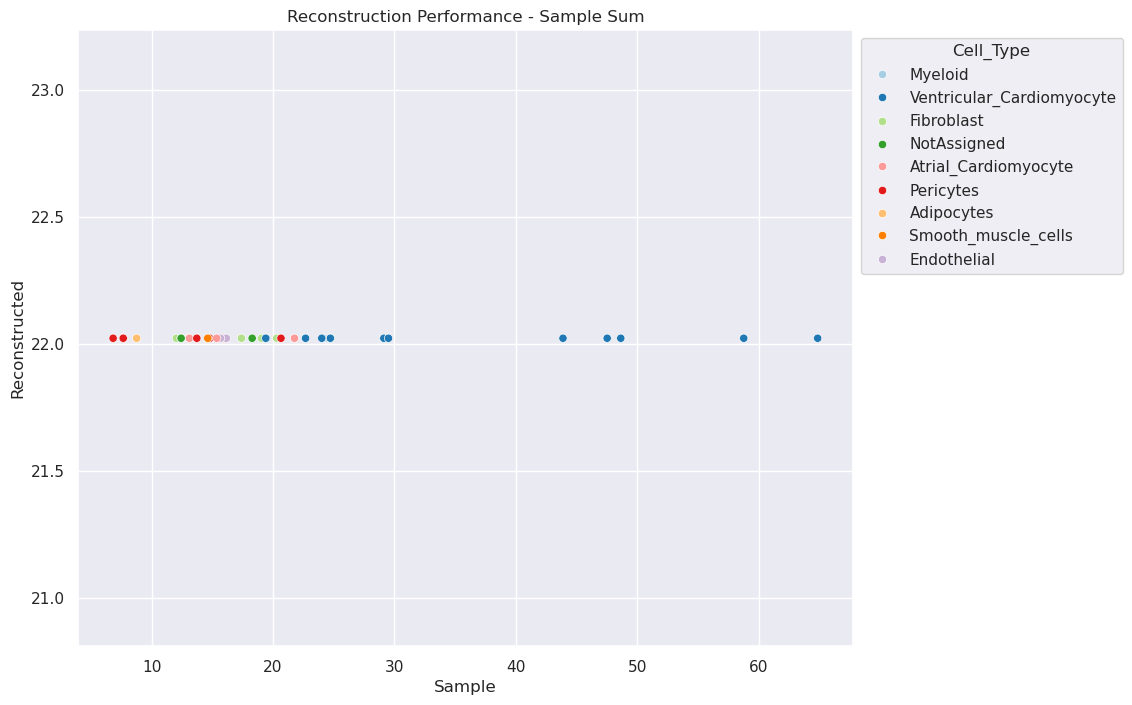

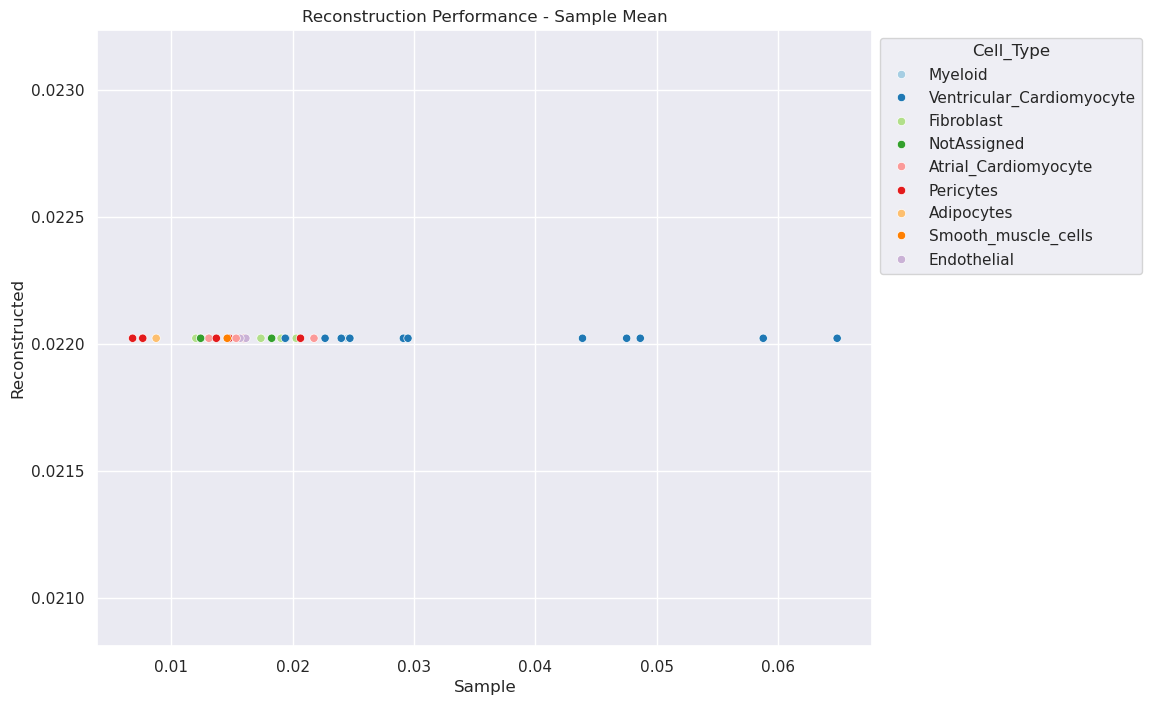

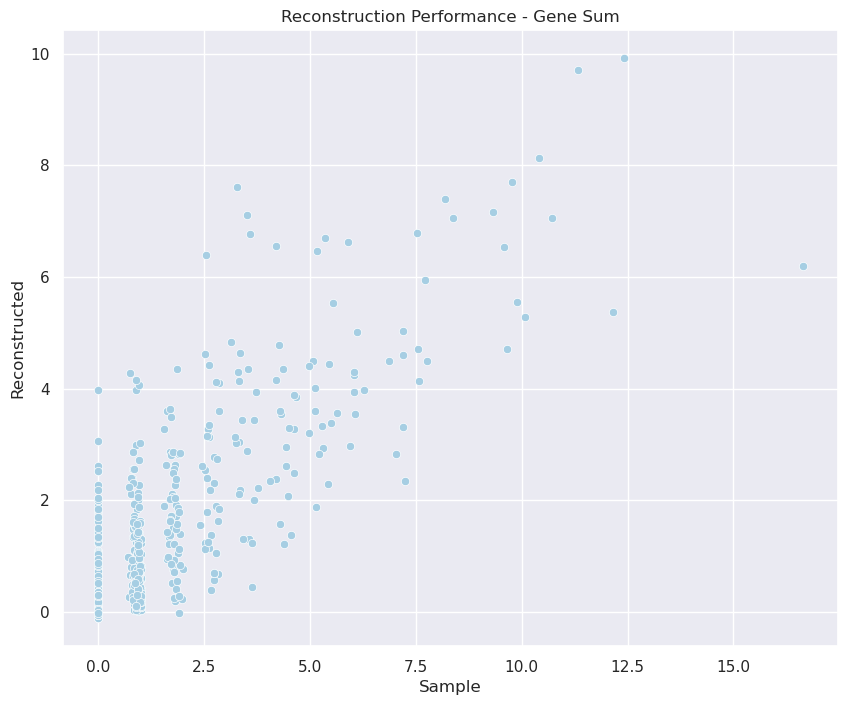

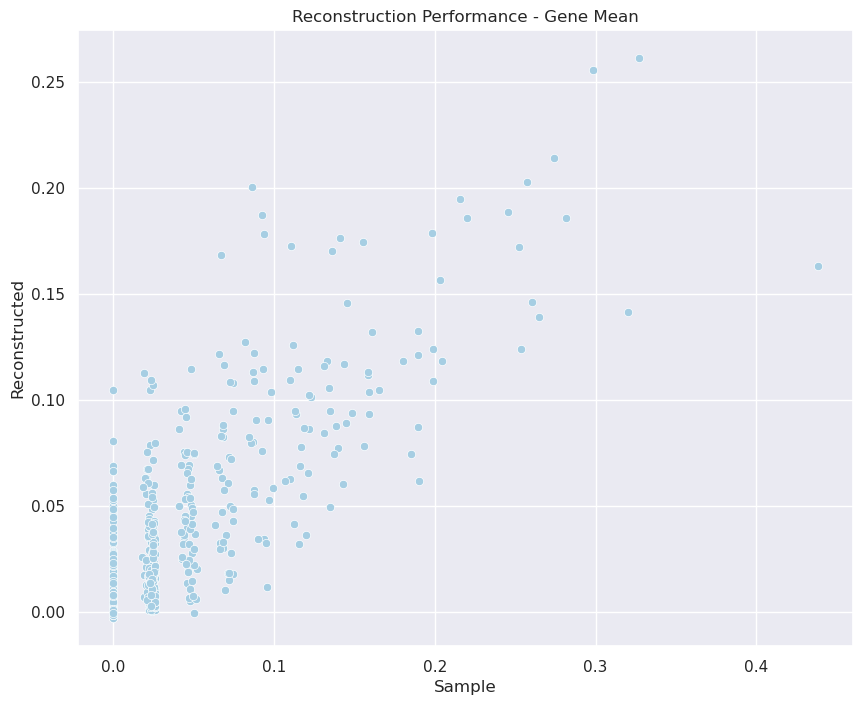

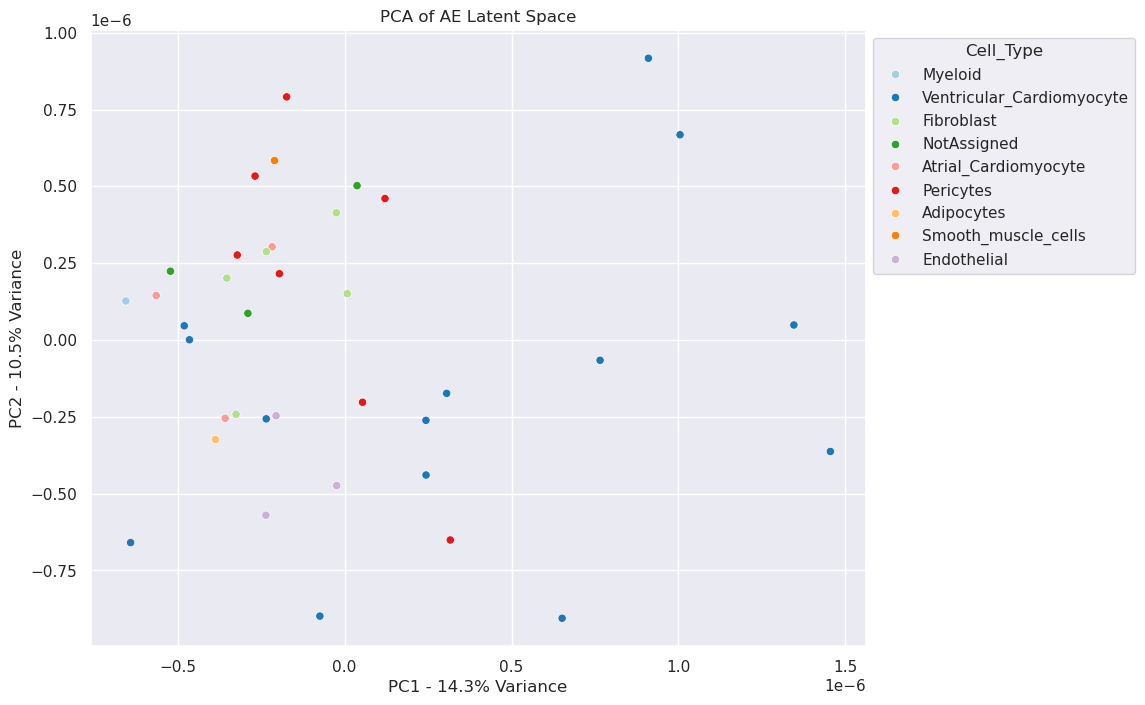

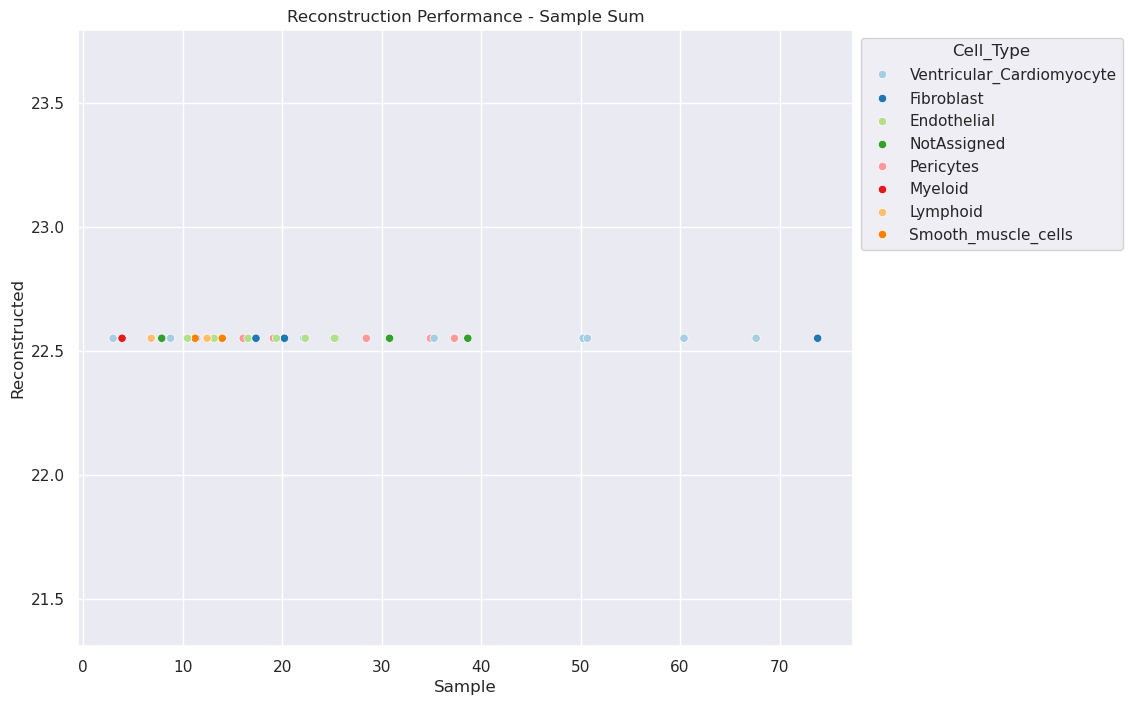

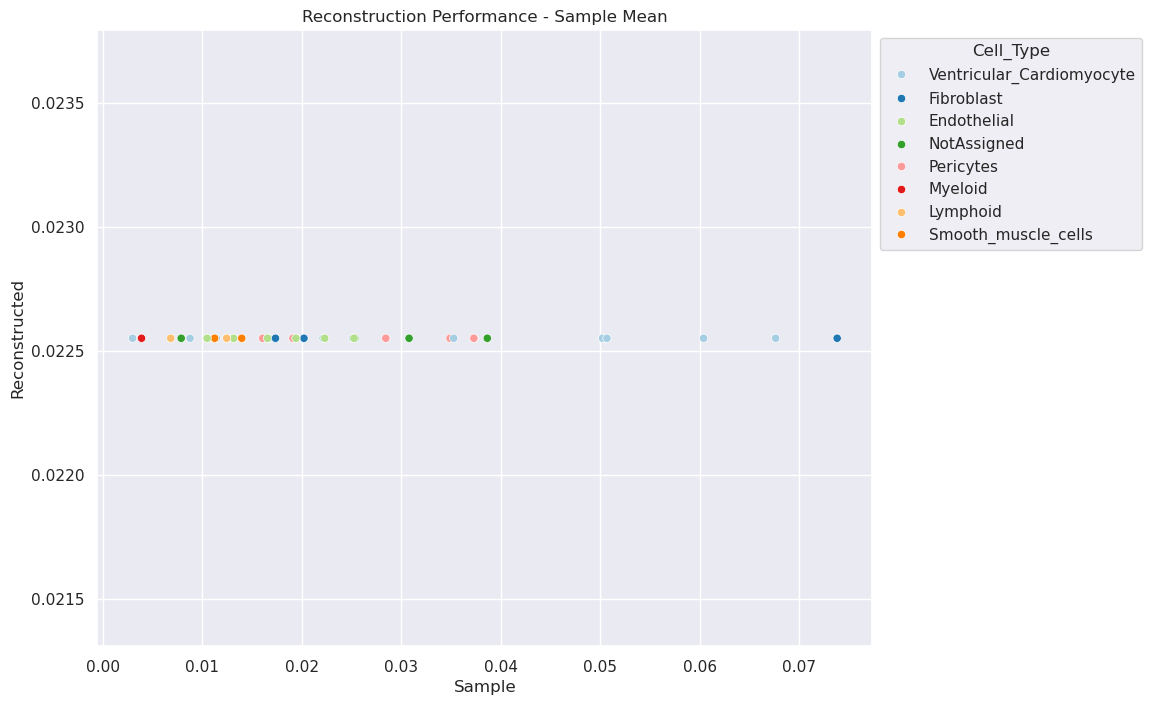

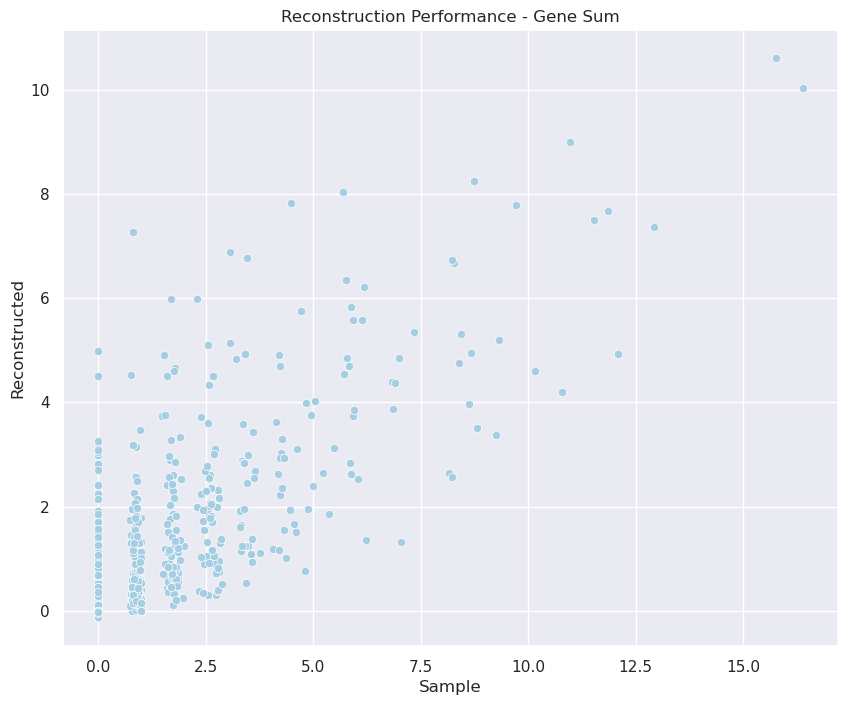

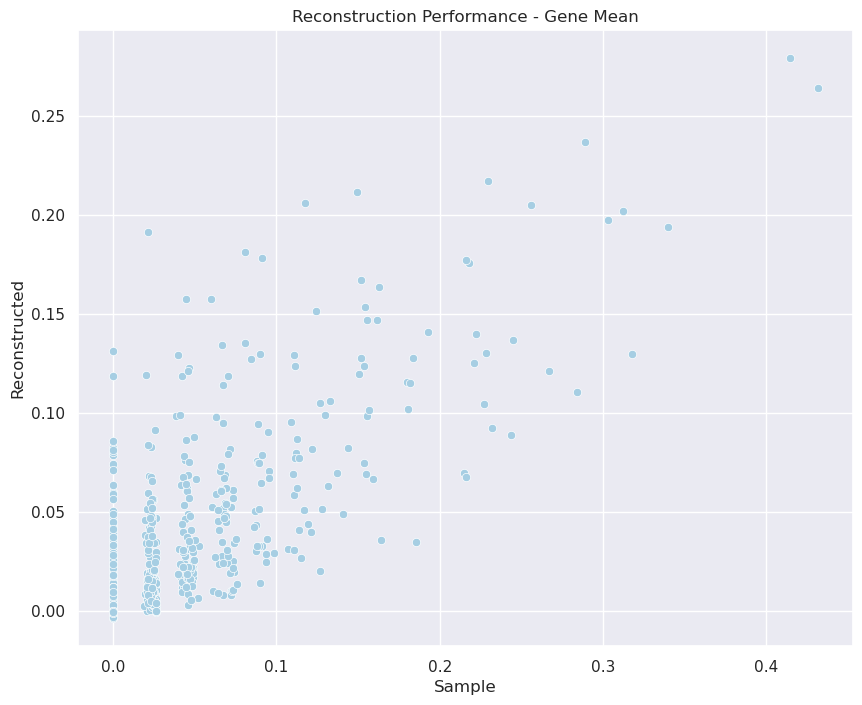

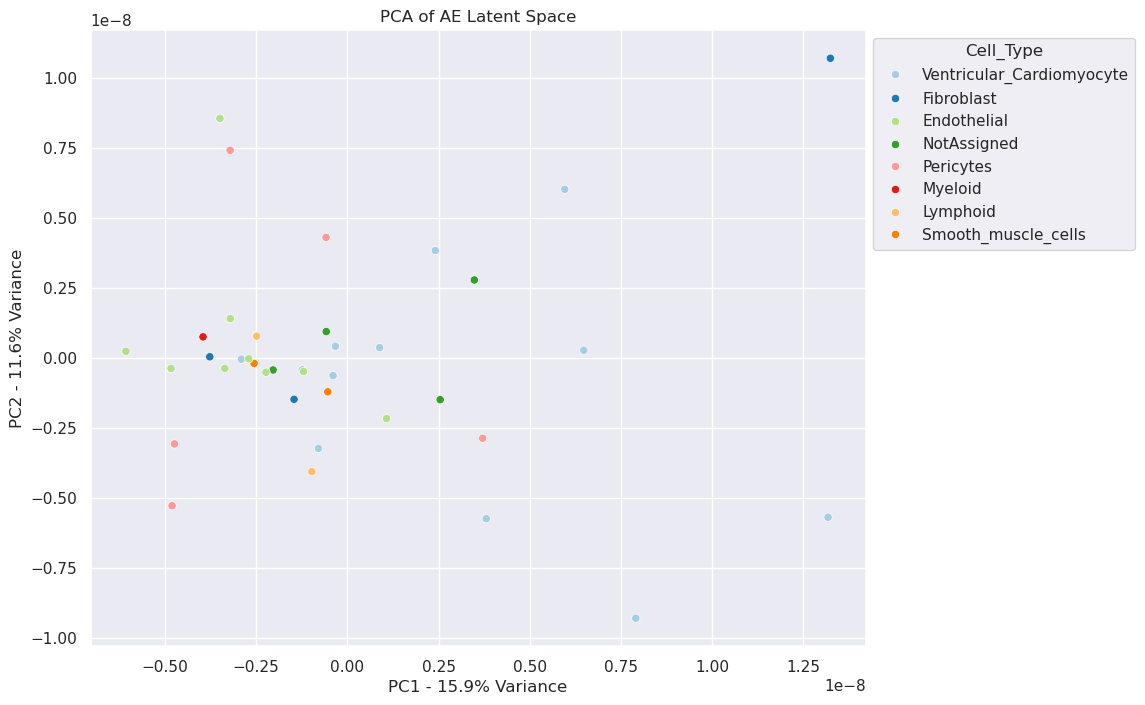

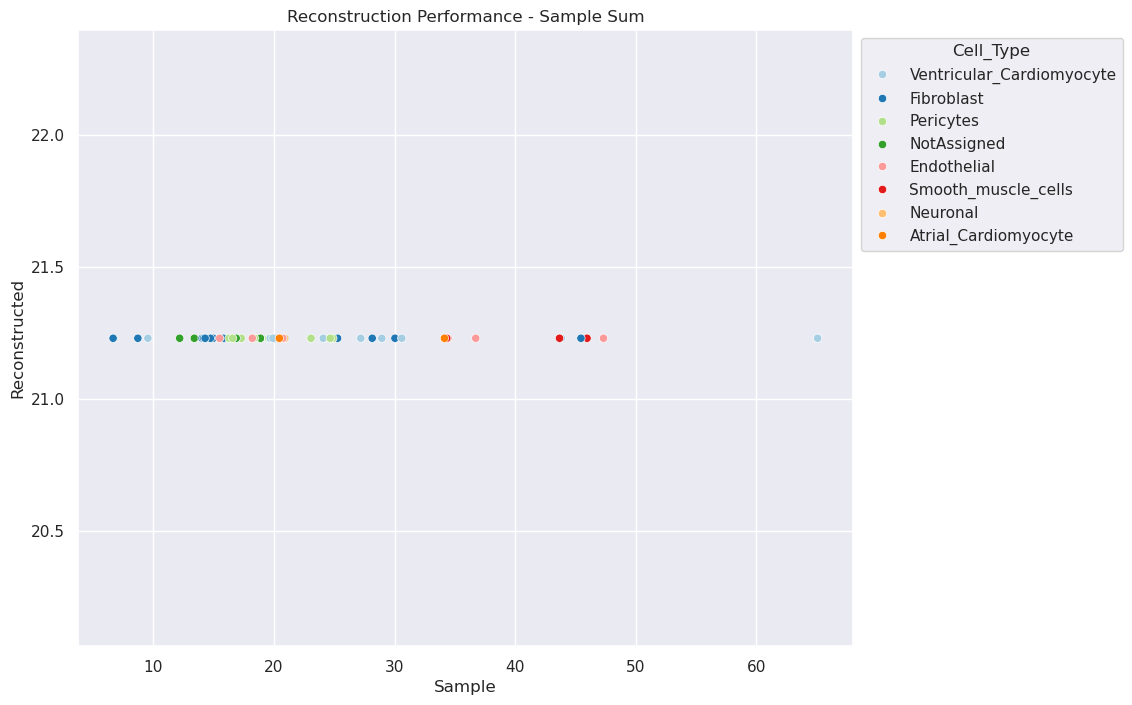

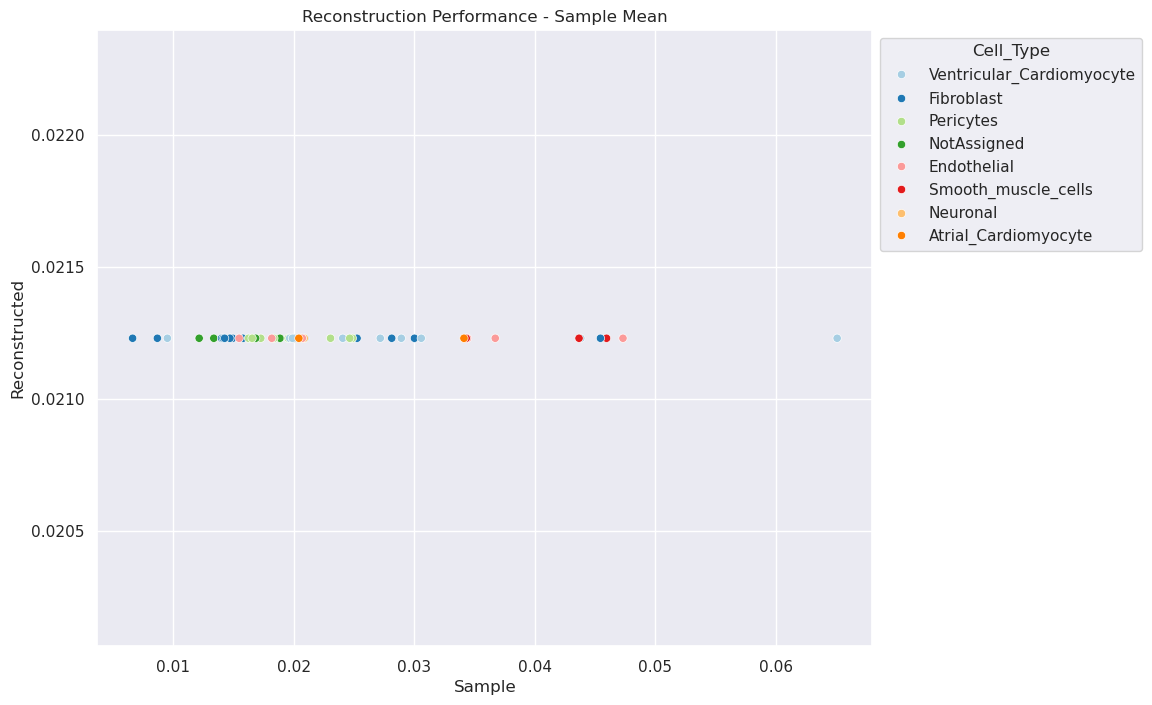

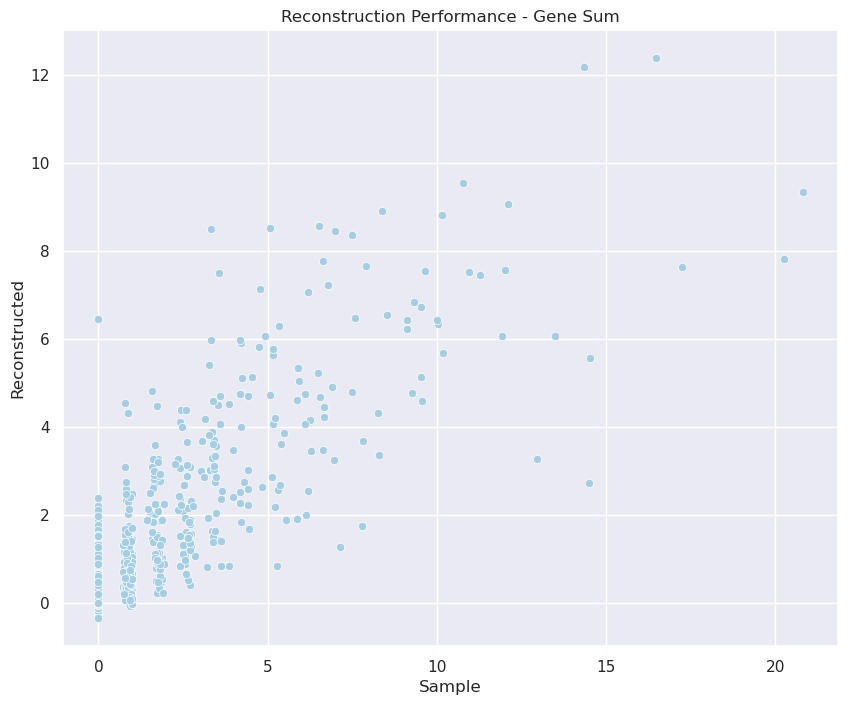

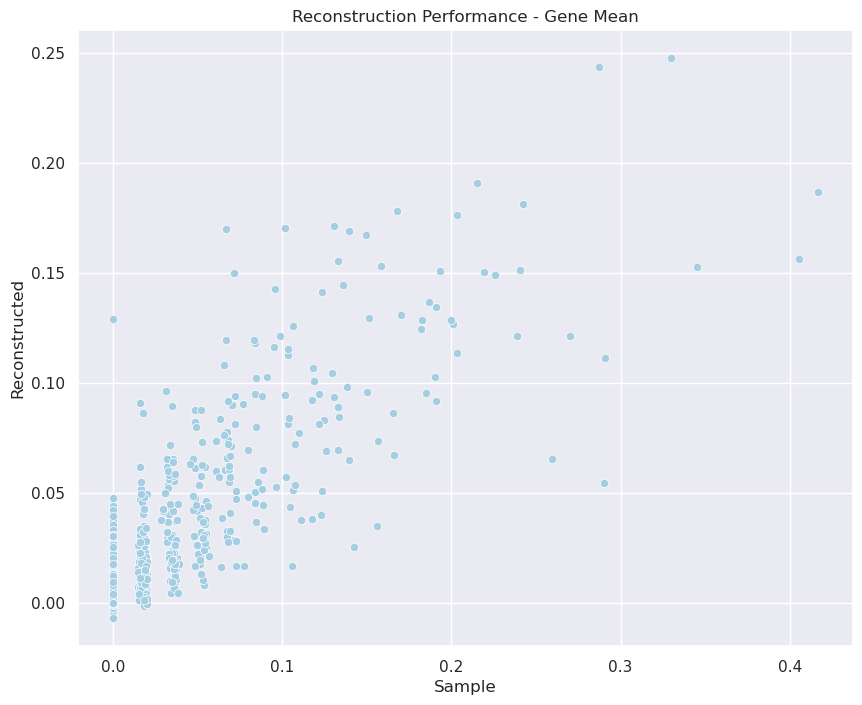

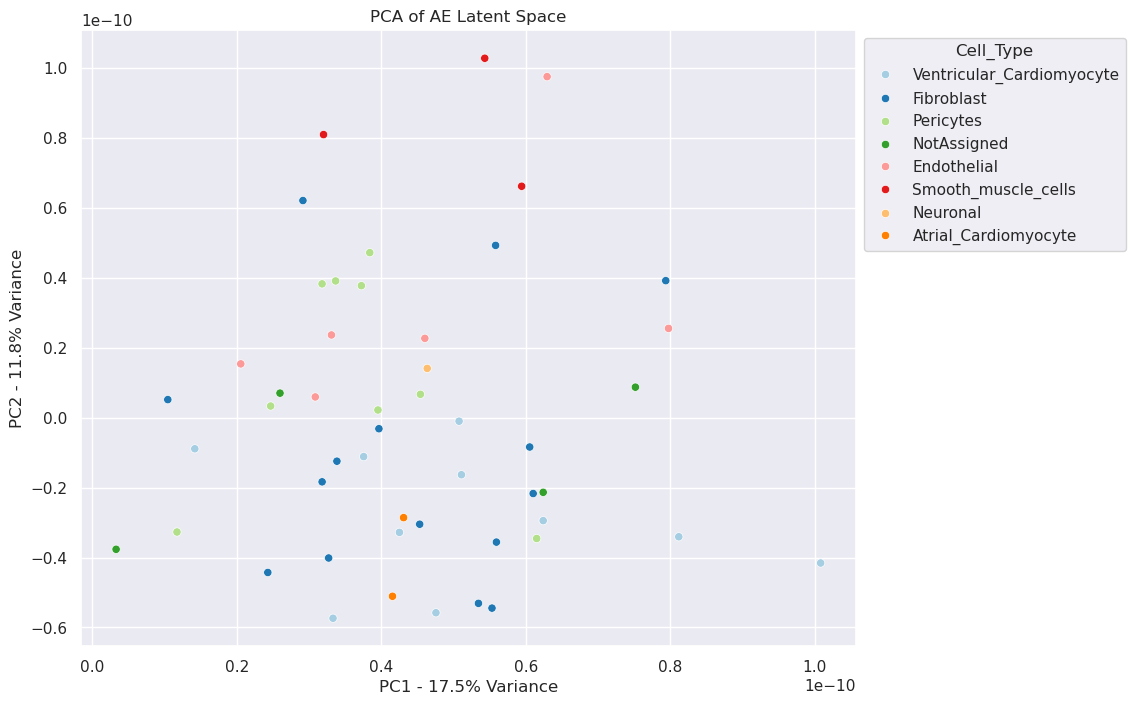

In [15]:
T.fit(
    model,
    config.model.name,
    adata,
    data_layer,
    config.model.optimization,
    config.training.batch_size,
    config.training.training_epochs,
    device,
    logger,
)